# Artificial neural network (tutorial)

## 1- Architecture of the model

### Keras Sequantial Model

An artificial neural network is organized in layers: <br>

- Dense (or fully connected layer)
- Convolutional layers
- Pooling layers
- Recurrent layers
- Normalization layers
- etc.
<br>

The sequential model is a linear stack of layers:

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

We are creating a variable called "model" and setting it equal to an instance of a sequential object. Within the constructor we are passing an array. The array has 2 "dense" objects.

__Dense__ is a type of layer. It connects each input to each output within the layer:

Inputs -- (w=0.2)----> DENSE -----> Output

output=activation(weighted sum of inputs)

### Schematic representation of the model we are building:

<img src="ANNModelType.png">

In [14]:
# 3input nodes connecting to 5 "dense" layers and 2 output nodes:
model = Sequential([
    Dense(5, input_shape=(3,), activation='relu'),
    Dense(2, activation='softmax'),
])

In [19]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

#img = np.expand_dims(ndimage.imread('NN.PNG'),0)
#plt.imshow(img[0])

### Activation Function

Activation function: Receives weighted sum and transforms into upper limit/lower limit. <br> 

Examples:
- Sigmoïd: Negative input -> small number, Positive input -> large number, close to zero -> 0.5
<img src="Sigm.png">

- ReLu: Rectified linear unit. Transforms the input to the maximum of 0 or input itself. More positif the neuron is, more activated it is. 
<img src="ReLu.png">


In [20]:
#Another way to build the sequential model
model = Sequential()
model.add(Dense(5, input_shape=(3,)))
model.add(Activation('relu'))

## 2- Training the model

- Optimizing weights : 
    - with stochastic gradient descent (SGD): assign the weight to minimize loss function.   
- Epoch: one single pass of the data throught the model. 

Model learns during this repeated process. 
At the end of each epoch the model produces an output (0.75 cat, 0.25 dog for example) and calculates the gradient of the loss function over the weight of the input. 

d(loss) / d(weight) * (learning rate -small number-)

<br>

### Producing some dummy data 

__Made up scenario:__
- We are testing a drug in a population whith age raging from 13 years old to 100 years old
- There are 2100 participants, half of them are under 65 years old, other half is above (duh!)
- Around 95% of the participants over 65 years old experienced side effects
- Around 95% of the participants under 65 years old did not experience side effects

In [34]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [32]:
train_labels = []
train_samples = []
test_samples = []
test_labels = []

In [35]:
'''We are creating the database ourselves. Experiencing side effects gives "1" as lable, 
not experiencing side effects gives "0"'''

for i in range(50):
#The ~5% of younger individuals who did experience side effects:
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
#The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
for i in range (1000):
#The 95% of youngers who didn't experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
#The 95% olders who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [36]:
for i in range(50):
#The ~5% of younger individuals who did experience side effects:
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
#The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
for i in range (1000):
#The 95% of youngers who didn't experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
#The 95% olders who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

create a numpy array with the formed lists
shuffle to get rid of any order.

In [38]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [39]:
# Scale down the data. The train samples are in a range 13-100 we transform this to be in a range of 0-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [68]:
#check the scaled data samples:
#for i in scaled_train_samples:
#    print(i)

In [41]:
#This is to check if there is an available GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


__In case of GPU recognition problem__ <br> 
Happens because tensorflow is set to work with CPU for some reason. Instead of conda install tensorflow I installed: 

conda install tensorflow-gpu <br>
conda install -c anaconda keras-gpu <br>


In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import backend as K

In [26]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

When doing multi-class classification, __categorical cross entropy loss__ is used a lot. It compares the predicted label and true label and calculates the loss. In Keras with TensorFlow backend support Categorical Cross-entropy, and a variant of it: Sparse Categorical Cross-entropy. 

In [30]:
# Adam is an optimizer that is a variation of SGD
# Sparse categorical crossentropy is a type of loss function
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# scaled_train_samples: numpy array that holds all the training data
# train labels: numpy array that holds all the labels corresponding to the training data
# batch size = 10 : how many pieces of data we want to send to the model at a given time.
# epochs = 20: there will be 20 individual passes of the data through our model
# shuffle the data in a different order at each epoch
# verbose = 2: we want to see 2 outputs printed to the screen at the end of training 
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
210/210 - 0s - loss: 0.6632 - accuracy: 0.5729
Epoch 2/20
210/210 - 0s - loss: 0.6372 - accuracy: 0.6605
Epoch 3/20
210/210 - 0s - loss: 0.6122 - accuracy: 0.7224
Epoch 4/20
210/210 - 0s - loss: 0.5861 - accuracy: 0.7543
Epoch 5/20
210/210 - 0s - loss: 0.5579 - accuracy: 0.7919
Epoch 6/20
210/210 - 0s - loss: 0.5263 - accuracy: 0.8190
Epoch 7/20
210/210 - 0s - loss: 0.4937 - accuracy: 0.8357
Epoch 8/20
210/210 - 0s - loss: 0.4623 - accuracy: 0.8543
Epoch 9/20
210/210 - 0s - loss: 0.4320 - accuracy: 0.8748
Epoch 10/20
210/210 - 0s - loss: 0.4059 - accuracy: 0.8829
Epoch 11/20
210/210 - 0s - loss: 0.3832 - accuracy: 0.8929
Epoch 12/20
210/210 - 0s - loss: 0.3640 - accuracy: 0.8962
Epoch 13/20
210/210 - 0s - loss: 0.3477 - accuracy: 0.9038
Epoch 14/20
210/210 - 0s - loss: 0.3340 - accuracy: 0.9086
Epoch 15/20
210/210 - 0s - loss: 0.3225 - accuracy: 0.9119
Epoch 16/20
210/210 - 0s - loss: 0.3129 - accuracy: 0.9124
Epoch 17/20
210/210 - 0s - loss: 0.3048 - accuracy: 0.9167
Epoch 

We see 20 Epochs running on each line (1/20, 2/20, etc.) with how long it took, loss function and the accuracy (accuracy gets better & better at each run).

### The concept of Loss

At the end of each epoch during the training process, the loss will be calculated using the network's output predictions and the true labels for the respective input.

In [43]:
model.loss = 'sparse_categorical_crossentropy'
model.loss

'sparse_categorical_crossentropy'

Other currently available loss functions for Keras:

- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh
- categorical_crossentropy
- sparse_categorical_crossentropy
- binary_crossentropy
- kullback_leibler_divergence
- poisson
- cosine_proximity

### Learning rate 

The training process starts with arbitrarily set weights, and then we incrementally update these weights as we move closer and closer to the minimized loss. <br>

The size of these steps we're taking to reach our minimized loss is going to depend on the learning rate. Conceptually, we can think of the learning rate of our model as the step size. <br>

We know that during training, after the loss is calculated for our inputs, the gradient of that loss is then calculated with respect to each of the weights in our model. <br>

Once we have the value of these gradients these gradients will then get multiplied by the learning rate: <br>

__gradients * learning rate__ 

<br>
This learning rate is a small number usually ranging between 0.01 and 0.0001, but the actual value can vary, and any value we get for the gradient is going to become pretty small once we multiply it by the learning rate. <br>

we then take each of these values and update the respective weights by subtracting this value from them.
<br>

__new weight = old weight - (learning rate * gradient)__

<br>
We ditch the previous weights that were set on each connection and update them with these new values. <br>
The value we choose for the learning rate is going to require some testing. The learning rate is a _hyperparameter_ that we have to test and tune with each model before we know exactly where we want to set it, but a typical guideline is to set it somewhere between 0.01 and 0.0001.

## Train, test, validation sets 

In [44]:
#validation_split: you don't need to make a validation set. 
#We can pass a parameter in Keras so that it splits out a given % (here 20%) as validation set.
model.fit(scaled_train_samples, train_labels, validation_split = 0.20, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
168/168 - 0s - loss: 0.2754 - accuracy: 0.9232 - val_loss: 0.3167 - val_accuracy: 0.9214
Epoch 2/20
168/168 - 0s - loss: 0.2723 - accuracy: 0.9268 - val_loss: 0.3144 - val_accuracy: 0.9214
Epoch 3/20
168/168 - 0s - loss: 0.2696 - accuracy: 0.9280 - val_loss: 0.3125 - val_accuracy: 0.9214
Epoch 4/20
168/168 - 0s - loss: 0.2672 - accuracy: 0.9280 - val_loss: 0.3108 - val_accuracy: 0.9214
Epoch 5/20
168/168 - 0s - loss: 0.2653 - accuracy: 0.9268 - val_loss: 0.3094 - val_accuracy: 0.9214
Epoch 6/20
168/168 - 0s - loss: 0.2633 - accuracy: 0.9327 - val_loss: 0.3082 - val_accuracy: 0.9214
Epoch 7/20
168/168 - 0s - loss: 0.2619 - accuracy: 0.9292 - val_loss: 0.3071 - val_accuracy: 0.9214
Epoch 8/20
168/168 - 0s - loss: 0.2604 - accuracy: 0.9280 - val_loss: 0.3061 - val_accuracy: 0.9214
Epoch 9/20
168/168 - 0s - loss: 0.2590 - accuracy: 0.9298 - val_loss: 0.3052 - val_accuracy: 0.9262
Epoch 10/20
168/168 - 0s - loss: 0.2579 - accuracy: 0.9315 - val_loss: 0.3044 - val_accuracy: 0.9262

Now we also have validation accuracy and validation loss. 

We can also input a validation dataset. It has to be a tuple like this: <br>

valid_set = [(sample, label), (sample, label), .... (sample, label)]

In [ ]:
# I havent't created a validation dataset though.
#model.fit(scaled_train_samples, train_labels, validation_data = valid_set, batch_size=10, epochs=20, shuffle=True, verbose=2)

## Predicting

In [45]:
# verbose = 0 here to see nothing printed to the screen
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [69]:
#for i in predictions:
#    print(i)

For each sample in our test set we are getting a probability that maps to either a patient "not experiencing a side effect" (right hand side), or a patient "experiencing a side effect".

__zero index: experiencing side effects. | index 1 : not experiencing side effects.__

For example, for the 1st patient (when I 1st ran this):

[0.2773791  0.72262084]

Model is assigning a 27% of probability for not experiencing a side effect and 72% probability to experience a side effect. 

In [70]:
# Getting only the the highest probability index
rounded_predictions = np.argmax(predictions, axis=-1)
#for i in rounded_predictions:
#    print(i)

## Confusion matrix to visualize results

In [ ]:
#!conda install matplotlib -y

In [48]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [49]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [50]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 953   97]
 [  49 1001]]


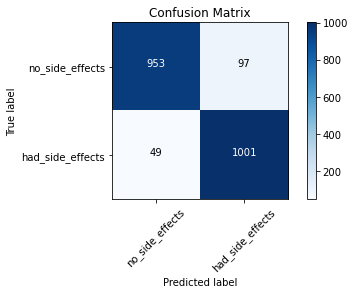

In [51]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Dark blue cells are correct predictions whereas the light blue ones are incorrect. 

## Save and load the Model

### 1. model.save() function

This function saves:

- The architecture of the model (if you need to recreate it)
- The wights of the model
- The training configuration (loss optimizer)
- The state of the optimizer, allowing to resume training exactly where you left off. 

It is the most comprehensive (saves everything).

In [60]:
#First, cheks if the file already exists
#If not, the model is saved to disk
import os.path
if os.path.isfile('models/ANN_medical_trial_model.h5') is False:
    model.save('C:/Users/deniz/OneDrive/Documents/Keras/models/ANN_medical_trial_model.h5')

### Loading the model

In [61]:
from tensorflow.keras.models import load_model
new_model = load_model('models/ANN_medical_trial_model.h5')

In [62]:
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [63]:
new_model.get_weights()

[array([[ 0.6068351 , -0.03218722, -0.48844436, -0.1923372 ,  0.7244437 ,
         -0.5440812 , -0.37127715, -0.4313075 , -0.10119525,  0.2050266 ,
          0.7479293 ,  0.1649594 , -0.20367262, -0.51541054, -0.47867346,
         -0.00719637]], dtype=float32),
 array([ 0.06406914,  0.        ,  0.        ,  0.21340236, -0.14202236,
         0.        ,  0.        ,  0.        ,  0.        ,  0.08248525,
        -0.12205636, -0.06494319,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-3.22288349e-02, -3.31036657e-01, -5.28580360e-02,
          4.13448550e-02,  1.80068880e-01, -3.35591823e-01,
          4.32567179e-01,  2.18965895e-02,  2.10976765e-01,
         -2.45318502e-01, -6.38332516e-02,  2.16491327e-01,
          1.02064453e-01,  3.29681970e-02, -1.38857588e-01,
         -5.27452156e-02, -2.60433048e-01,  4.20925558e-01,
         -2.46955976e-01, -3.43114704e-01,  3.36784214e-01,
          2.05408633e-02,  4.10876870e-02,  2.85254419e-01,
 

### 2. model.to_json() 

model.to_json() only saves the architecture of the model to a json string. It doesn't save the weights or the training configuration.  

In [64]:
#save as JSON
json_string = model.to_json()

#save as YAML
#yaml_string = model.to_yaml()

In [66]:
#model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model reconstruction with YAML
#from tensorflow.keras.models import model_from_yaml
#model = model_from_yaml(yaml_string)

In [67]:
model_architecture.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
